In [18]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [19]:
data = pd.read_csv("filtro.csv")

In [20]:
data["Authors"]

0                   Bajno D.; Grzybowska A.; Bednarz Ł.
1      Zou J.; Ye B.; Qu L.; Wang Y.; Orgun M.A.; Li L.
2     Agarwal S.; Saxena K.K.; Agrawal V.; Dixit J.K...
3     Kuwajima J.I.; Fan F.M.; Schwanenberg D.; Reis...
4         Aretoulis G.N.; Papathanasiou J.; Antoniou F.
5                  Govindarajulu K.; Venkataramaraju D.
6               Ibrahim S.S.; Olarewaju O.; Yearwood V.
7                                          Cormany D.L.
8     Otekunrin A.O.; Fagboro G.D.; Nwanji T.I.; Asa...
9                                 Faridi M.R.; Sinha S.
10          Imadabathuni L.S.; Asadi S.S.; Chandra D.S.
11    Abdi-Dehkordi M.; Bozorg-Haddad O.; Salavitaba...
12                            Tavakolan M.; Nikoukar S.
13            Arab Momeni M.; Yaghoubi S.; Aliha M.R.M.
14                          Dorfleitner G.; Nguyen Q.A.
15                                    Sarkar S.; Ray B.
16            Jahan R.; Hashem T.; Salim F.D.; Barua S.
17    Tembhurne J.V.; Gajbhiye S.M.; Gannarpwar 

In [21]:
profile = ProfileReport(data, title="Profiling Report")

In [12]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [25]:
data.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Abstract', 'Indexed Keywords',
       'Author Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [26]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

"Construction waste; Cost impact; Quantitative data; Subcontracting; Waste management plan Bid for public work; Building contractors; Building evaluation; Building/construction economics; Construction industry; Contract management; Government of Ghana; Higher education Data analysis; Ensemble; Healthcare; Machine learning; Medical insurance; Prediction task Facility management; Facility selection; Financial analysis; Functional analysis; Risk analysis; Value engineering Clinical pathway; Lean thinking; Public health; Six Sigma brand perceptions; generation; Millennials Circular Economy; Decision Tree Model; Electronic Waste; Expected Returns Maximization; Fraud Prevention; Government Subsidy Construction project management; Material management; Post-contract; Quantity surveyors; Waste minimization Islamic finance; Islamic liquidity management; Islamic Treasury Instruments; Maldives Corporate governance indicator; financial performance; principal component analysis; risk management indi

In [27]:
stop_words = stopwords.words('english')

In [28]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [29]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [30]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [31]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [32]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
management      15
analysis         8
project          5
financial        5
waste            5
construction     4
blockchain       4
industry         3
ratio            3
islamic          3

In [33]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

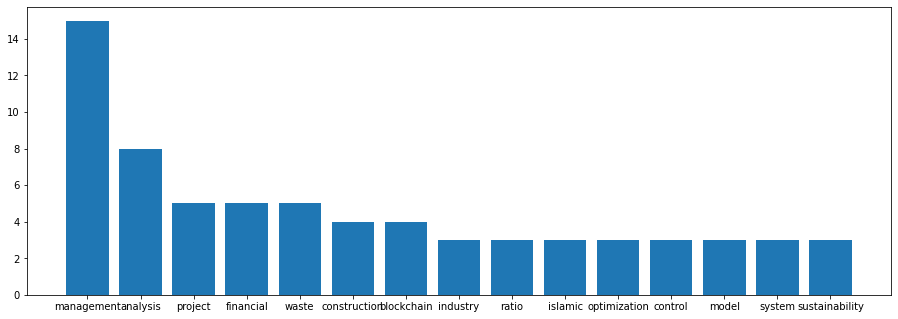

In [34]:
plot_bar(data=df, top=15)

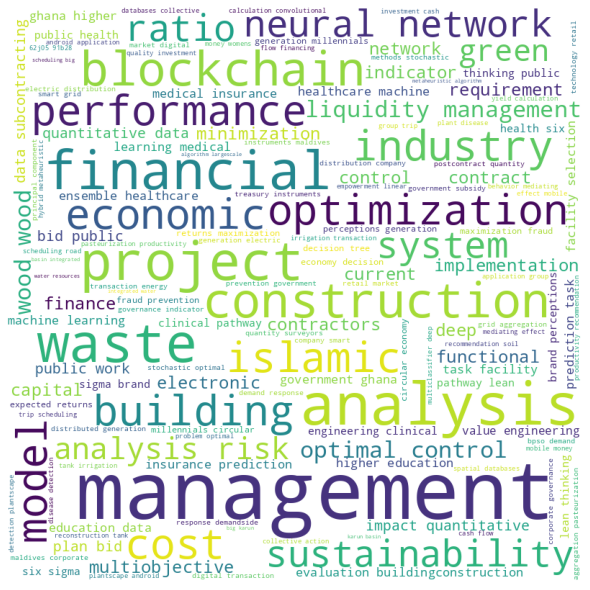

In [35]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
data.head()

Authors  \
0                Bajno D.; Grzybowska A.; Bednarz Ł.   
1   Zou J.; Ye B.; Qu L.; Wang Y.; Orgun M.A.; Li L.   
2  Agarwal S.; Saxena K.K.; Agrawal V.; Dixit J.K...   
3  Kuwajima J.I.; Fan F.M.; Schwanenberg D.; Reis...   
4      Aretoulis G.N.; Papathanasiou J.; Antoniou F.   

                                   Author full names  \
0  Bajno, Dariusz (55901731300); Grzybowska, Agni...   
1  Zou, Jun (57212626724); Ye, Bin (57089756100);...   
2  Agarwal, Sucheta (56865149900); Saxena, Kuldee...   
3  Kuwajima, Julio Issao (57209440929); Fan, Fern...   
4  Aretoulis, Georgios N. (34879434700); Papathan...   

                                        Author(s) ID  \
0              55901731300; 57203284053; 57188693919   
1  57212626724; 57089756100; 55994754800; 7601520...   
2  56865149900; 34974741700; 57190608115; 5720177...   
3  57209440929; 55963964200; 56070304500; 5721235...   
4              34879434700; 15729908500; 36478345000   

                                              Titles  Year  \
0  Old and modern wooden buildings in the context...  2021   
1  A Proof-of-Trust Consensus Protocol for Enhanc...  2019   
2  Prioritizing the barriers of green smart manuf...  2022   
3  Climate change, water-related disasters, flood...  2019   
4  PROMETHEE-based ranking of project managers ba...  2020   

                              Source title  Volume Issue   Art. No.  \
0                                 Energies    14.0    18     5975.0   
1  IEEE Transactions on Services Computing    12.0     3  8332496.0   
2                              TQM Journal     NaN   NaN        NaN   
3   Geological Society Special Publication   488.0     1        NaN   
4                               Kybernetes    49.0     4        NaN   

   Page start  ...  Cited by  \
0         NaN  ...         3   
1       429.0  ...       111   
2         NaN  ...         1   
3       259.0  ...         8   
4      1083.0  ...         5   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  Construction is a powerful industry that is no...   
1  Incorporating accountability mechanisms in onl...   
2  Purpose: Manufacturing companies are increasin...   
3  Because of climate change, the frequency, inte...   
4  Purpose: This paper aims to rank and identify ...   

                                    Indexed Keywords  \
0  Building materials; Conservation; Construction...   
1  Blockchain; Contracts; Electronic money; Fault...   
2  Electronic data interchange; Embedded systems;...   
3  Brazil; Sao Francisco River; air temperature; ...   
4  Behavioral research; Decision making; Managers...   

                                     Author Keywords Document Type  \
0  3D laser scanning; Biological corrosion; Const...       Article   
1  Accountability; blockchain; byzantine agreemen...       Article   
2  AHP; Automotive industry; Green; Industry 4.0;...       Article   
3                                                NaN       Article   
4  Multicriteria decision analysis; Personality f...       Article   

  Publication Stage                        Open Access  Source  \
0             Final  All Open Access; Gold Open Access  Scopus   
1             Final                                NaN  Scopus   
2  Article in press                                NaN  Scopus   
3             Final                                NaN  Scopus   
4             Final                                NaN  Scopus   

                  EID  
0  2-s2.0-85115379077  
1  2-s2.0-85045186672  
2  2-s2.0-85139261546  
3  2-s2.0-85076468041  
4  2-s2.0-85068120345  

[5 rows x 23 columns]